In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import imdb

# Load the dataset
num_words = 10000  # We will use the top 10,000 words in the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Decode the reviews back to words
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([index_word.get(i - 3, '?') for i in encoded_review])

decoded_reviews = [decode_review(review) for review in x_train[:5]]
print(decoded_reviews)


1641221/1641221 [==============================] - 0s 0us/step
["? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

Step 2: Data Preprocessing
We need to preprocess the text data for the model. Here we will pad sequences to ensure uniform input size.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500  # Maximum length of review (in words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


Step 3: Model Selection
We'll use a simple LSTM model for sentiment analysis.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

embedding_dim = 32

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373301 (1.42 MB)
Trainable params: 373301 (1.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 4: Model Training
Train the model on the training data.

In [ ]:
batch_size = 64
epochs = 5

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/5
313/313 [==============================] - 262s 828ms/step - loss: 0.5196 - accuracy: 0.7290 - val_loss: 0.3701 - val_accuracy: 0.8420
Epoch 2/5
313/313 [==============================] - 291s 931ms/step - loss: 0.2992 - accuracy: 0.8816 - val_loss: 0.3238 - val_accuracy: 0.8716
Epoch 3/5
313/313 [==============================] - 285s 912ms/step - loss: 0.2148 - accuracy: 0.9202 - val_loss: 0.3276 - val_accuracy: 0.8754
Epoch 4/5
313/313 [==============================] - 233s 746ms/step - loss: 0.1915 - accuracy: 0.9294 - val_loss: 0.3482 - val_accuracy: 0.8668
Epoch 5/5
313/313 [==============================] - 227s 726ms/step - loss: 0.2443 - accuracy: 0.8960 - val_loss: 0.3901 - val_accuracy: 0.8384


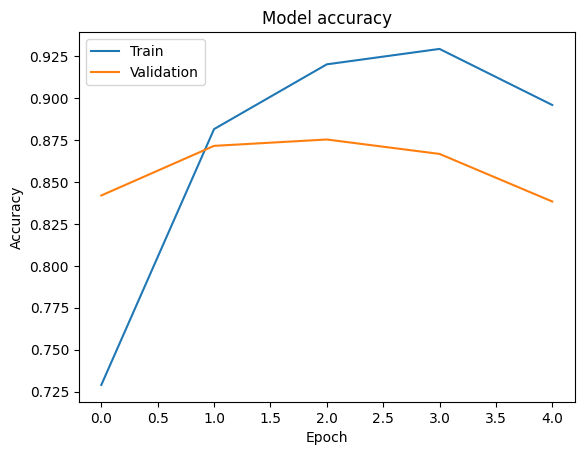

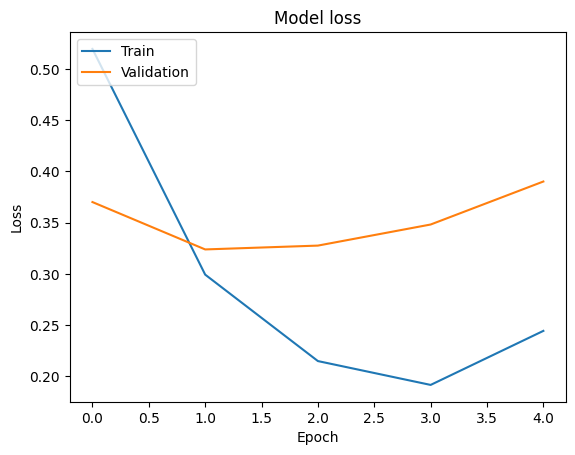

In [7]:
# prompt: explain the output of this model in details

# The model output is stored in the 'history' variable.
# Let's analyze the training and validation metrics:

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Detailed Explanation:

# 1. Accuracy Plots:
# - The accuracy plot shows how the model's accuracy on the training and validation sets changes over epochs.
# - Ideally, both training and validation accuracy should increase, indicating the model is learning.
# - If validation accuracy plateaus or decreases while training accuracy keeps increasing, it might indicate overfitting.

# 2. Loss Plots:
# - The loss plot shows how the model's error (binary crossentropy in this case) on training and validation sets changes over epochs.
# - Both training and validation loss should decrease, indicating the model is getting better at predicting sentiment.
# - Similar to accuracy, a divergence between training and validation loss might suggest overfitting.

# 3. Interpretation:
# - By analyzing these plots, you can gain insights into how well the model is learning and generalizing to unseen data.
# - If the model shows good performance on both training and validation sets, it's a positive sign.
# - However, if there's a significant gap between the two, you might need to adjust hyperparameters (like learning rate, number of epochs, etc.) or consider regularization techniques to prevent overfitting.

# Remember that these plots provide a visual representation of the model's performance.
# You can also access the numerical values of accuracy and loss from the 'history' object for further analysis.
